In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
Datadir = "./People"
CATEGORIES = ["Women_Smile","Women_Not_Smile","Man_Not_Smile","Man_Smile"]


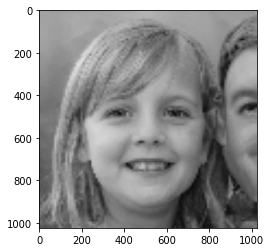

In [15]:
# for categories in CATEGORIES:
#     path = os.path.join(Datadir,categories)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
#         plt.imshow(img_array
#         break
#     break

In [4]:
# img_array.shape

(1024, 1024)

In [3]:
IMG_SIZE = 100
# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array,cmap="gray")
# new_array1 = cv2.resize(new_array, (1024, 1024))

# cv2.imwrite("./dogtest/watch/100.jpg",new_array1)


In [41]:
# new_array[0]

array([115, 160, 159, 133, 128, 131, 142, 141, 137, 138, 149, 147, 144,
       120, 142, 158, 149, 157, 160, 153, 145, 155, 118, 163, 157, 220,
       222, 221, 218, 219, 216, 178, 110, 112, 107, 122, 123, 109, 117,
       109, 106, 109, 109, 143, 151, 172, 165, 157, 148, 139], dtype=uint8)

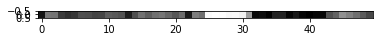

In [44]:
# plt.imshow(new_array[0:1],cmap="gray")

In [5]:
# training_data = []
# def create_training_data():
#     for categories in CATEGORIES:
#         path = os.path.join(Datadir,categories)
#         if categories == "Man_Not_Smile" or categories == "Man_Smile":
#             class_num = 0
#         else:
#             class_num = 1
# #         class_num = CATEGORIES.index(categories)
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#                 training_data.append([new_array,class_num])
#             except Exception as e:
#                 pass

In [6]:
# create_training_data()

In [7]:
# print(len(training_data))

6779


In [8]:
# import random
# random.shuffle(training_data)

In [9]:
# for x in training_data[0:10]:
#     print(x[1])

0
0
1
0
0
0
1
0
0
1


In [10]:
# X = []
# y = []

In [11]:
# for features, label in training_data:
#     X.append(features)
#     y.append(label)

In [12]:
# X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# y = np.array(y)

In [1]:
import pickle

In [10]:
# np.save("features.npy",X)
# np.save("label.npy",y)
y

array([0, 0, 1, ..., 0, 0, 1])

In [9]:
X = np.load("features.npy")
y = np.load("label.npy")

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [10]:
X = X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [12]:
model.fit(X,y,batch_size = 32,epochs=40, validation_split =0.15)

Train on 5762 samples, validate on 1017 samples
Epoch 1/40
5762/5762 [==============================] - 68s 12ms/sample - loss: 0.6280 - accuracy: 0.6689 - val_loss: 0.5890 - val_accuracy: 0.7040
Epoch 2/40
5762/5762 [==============================] - 61s 11ms/sample - loss: 0.5413 - accuracy: 0.7272 - val_loss: 0.5686 - val_accuracy: 0.6755
Epoch 3/40
5762/5762 [==============================] - 62s 11ms/sample - loss: 0.4986 - accuracy: 0.7480 - val_loss: 0.5324 - val_accuracy: 0.7070
Epoch 4/40
5762/5762 [==============================] - 62s 11ms/sample - loss: 0.4794 - accuracy: 0.7595 - val_loss: 0.5245 - val_accuracy: 0.7080
Epoch 5/40
5762/5762 [==============================] - 63s 11ms/sample - loss: 0.4603 - accuracy: 0.7711 - val_loss: 0.5413 - val_accuracy: 0.7512
Epoch 6/40
5762/5762 [==============================] - 62s 11ms/sample - loss: 0.4389 - accuracy: 0.7803 - val_loss: 0.5286 - val_accuracy: 0.7227
Epoch 7/40
5762/5762 [==============================] - 67s 12ms

In [42]:
# y

array([1, 0, 1, ..., 0, 1, 0])

In [35]:
# y_binary = to_categorical(y)

In [13]:
model.save("40_epochs.h5")